In [1]:
#Import library
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Buat direktori
import os

base_dir = 'C:/Users/akip/Desktop/fix-vgg16/datafix'
# Membuat direktori
os.makedirs(base_dir, exist_ok=True)

# Menampilkan isi dari direktori
print(os.listdir(base_dir))

['latih', 'validasi']


In [3]:
# import os
# import cv2

# # Tentukan path folder yang berisi gambar dan path folder untuk menyimpan gambar yang telah diubah ukurannya
# folder_paths = [
#     "C:/Users/akip/Desktop/fix-vgg16/daun jeruk/latih/CVPD",
#     "C:/Users/akip/Desktop/fix-vgg16/daun jeruk/latih/kankerjeruk",
#     "C:/Users/akip/Desktop/fix-vgg16/daun jeruk/latih/sehat",
#     "C:/Users/akip/Desktop/fix-vgg16/daun jeruk/latih/ulatpeliang",
#     "C:/Users/akip/Desktop/fix-vgg16/daun jeruk/validasi/CVPD",
#     "C:/Users/akip/Desktop/fix-vgg16/daun jeruk/validasi/kankerjeruk",
#     "C:/Users/akip/Desktop/fix-vgg16/daun jeruk/validasi/sehat",
#     "C:/Users/akip/Desktop/fix-vgg16/daun jeruk/validasi/ulatpeliang"
# ]
# output_folders = [
#     "C:/Users/akip/Desktop/fix-vgg16/datafix/latih/CVPD",
#     "C:/Users/akip/Desktop/fix-vgg16/datafix/latih/KANKER",
#     "C:/Users/akip/Desktop/fix-vgg16/datafix/latih/SEHAT",
#     "C:/Users/akip/Desktop/fix-vgg16/datafix/latih/ULATPELIANG",
#     "C:/Users/akip/Desktop/fix-vgg16/datafix/validasi/CVPD",
#     "C:/Users/akip/Desktop/fix-vgg16/datafix/validasi/KANKER",
#     "C:/Users/akip/Desktop/fix-vgg16/datafix/validasi/SEHAT",
#     "C:/Users/akip/Desktop/fix-vgg16/datafix/validasi/ULATPELIANG"
# ]

# # Tentukan ukuran baru untuk gambar
# new_size = (224, 224)

# # Loop melalui semua path folder
# for folder_path, output_folder in zip(folder_paths, output_folders):
#     # Pastikan output folder ada, jika tidak, buat folder baru
#     # os.makedirs(output_folder, exist_ok=True)
    
#     # Loop melalui semua file dalam folder
#     for filename in os.listdir(folder_path):
#         # Baca gambar
#         image_path = os.path.join(folder_path, filename)
#         image = cv2.imread(image_path)
        
#         # Ubah ukuran gambar
#         resized_image = cv2.resize(image, new_size)
        
#         # Simpan gambar yang telah diubah ukurannya
#         output_path = os.path.join(output_folder, filename)  # Path untuk menyimpan gambar yang telah diubah ukurannya
#         cv2.imwrite(output_path, resized_image)


In [4]:
#menentukan direktorinya
# data_dir = os.path.join(base_dir, 'data')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [5]:
#Direktori isi latih
train_CVPD = os.path.join(train_dir, 'CVPD/')
train_KANKER = os.path.join(train_dir, 'KANKER/')
train_ULATPELIANG = os.path.join(train_dir, 'ULATPELIANG/')
train_SEHAT = os.path.join(train_dir, 'SEHAT/')

#Direktori isi uji
validation_CVPD = os.path.join(validation_dir, 'CVPD/')
validation_KANKER = os.path.join(validation_dir, 'KANKER/')
validation_ULATPELIANG = os.path.join(validation_dir, 'ULATPELIANG/')
validation_SEHAT = os.path.join(validation_dir, 'SEHAT/')

In [6]:
print("Jumlah Train CVPD                    = ", len(os.listdir(train_CVPD)))
print("Jumlah Train kankerjeruk             = ", len(os.listdir(train_KANKER)))
print("Jumlah Train ulatpeliang             = ", len(os.listdir(train_ULATPELIANG)))
print("Jumlah Train sehat                   = ", len(os.listdir(train_SEHAT)))

print('=======================================================================================')

print("Jumlah Validation CVPD               = ", len(os.listdir(validation_CVPD)))
print("Jumlah Validation kankerjeruk        = ", len(os.listdir(validation_KANKER)))
print("Jumlah Validation ulatpeliang        = ", len(os.listdir(validation_ULATPELIANG)))
print("Jumlah Validation ulatpeliang        = ", len(os.listdir(validation_SEHAT)))


Jumlah Train CVPD                    =  36
Jumlah Train kankerjeruk             =  36
Jumlah Train ulatpeliang             =  36
Jumlah Train sehat                   =  36
Jumlah Validation CVPD               =  9
Jumlah Validation kankerjeruk        =  9
Jumlah Validation ulatpeliang        =  9
Jumlah Validation ulatpeliang        =  9


In [7]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD  

# VGG 16
model = keras.Sequential()

# Block 1
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Top
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(4, activation="softmax"))

# Compile the model with Gradient Descent with Momentum optimizer
optimizer = SGD(learning_rate=0.001, momentum=0.9)  # Set learning rate and momentum values
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [8]:
from keras import optimizers
import tensorflow as tf


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Definisikan metrik F1
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# Inisialisasi optimizer
adam = optimizers.Adam()

# Kompilasi model
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=[
                  'accuracy',
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  F1Score(name='f1_score')
              ])



In [9]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [10]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 144 images belonging to 4 classes.


In [12]:
val_set = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 36 images belonging to 4 classes.


In [16]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

from keras.utils import to_categorical

checkpoint = ModelCheckpoint(filepath="model.keras", verbose=3, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=3,
  validation_steps=1,
  callbacks=callbacks,
  verbose=3)


duration = datetime.now() - start
print("Waktu Latih : ", duration)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.56088, saving model to model.keras
Epoch 2/20

Epoch 2: val_loss did not improve from 0.56088
Epoch 3/20

Epoch 3: val_loss did not improve from 0.56088
Epoch 4/20

Epoch 4: val_loss did not improve from 0.56088
Epoch 5/20

Epoch 5: val_loss did not improve from 0.56088
Epoch 6/20

Epoch 6: val_loss did not improve from 0.56088
Epoch 7/20

Epoch 7: val_loss did not improve from 0.56088
Epoch 8/20

Epoch 8: val_loss did not improve from 0.56088
Epoch 9/20

Epoch 9: val_loss did not improve from 0.56088
Epoch 10/20

Epoch 10: val_loss did not improve from 0.56088
Epoch 11/20

Epoch 11: val_loss did not improve from 0.56088
Epoch 12/20

Epoch 12: val_loss did not improve from 0.56088
Epoch 13/20

Epoch 13: val_loss did not improve from 0.56088
Epoch 14/20

Epoch 14: val_loss did not improve from 0.56088
Epoch 15/20

Epoch 15: val_loss did not improve from 0.56088
Epoch 16/20

Epoch 16: val_loss did not improve from 0.56088
Epoch 17/20



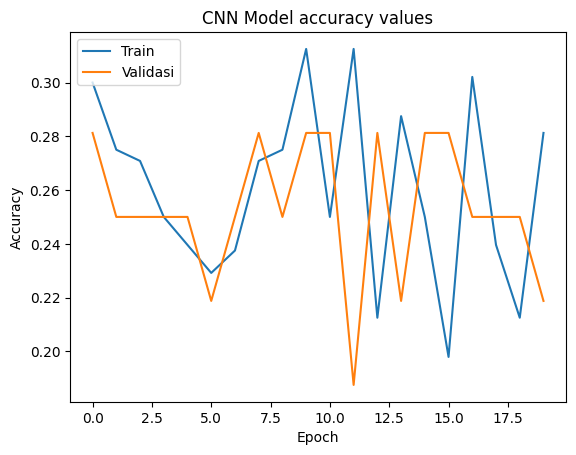

In [17]:
# Plot Akurasi
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()


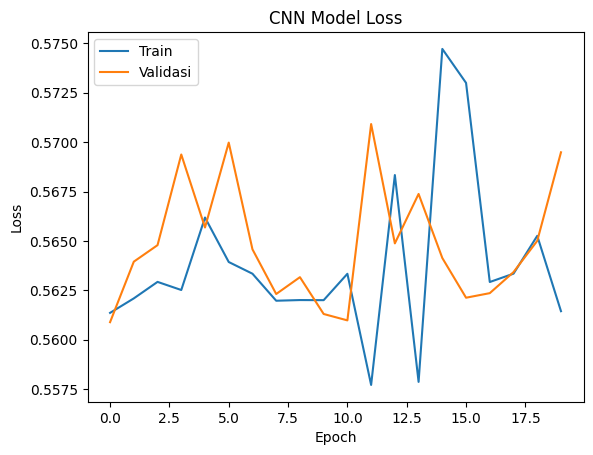

In [18]:
# Plot Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()